In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy import stats
from collections import Counter
from sklearn.externals.six import StringIO
from IPython.display import Image
import seaborn as sns
%matplotlib inline

In [2]:
DataClean = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/DataClean.csv')
DataClean = DataClean.drop(['Unnamed: 0','date25','nsrrid', 'S', 'O', 'P', 'G'], axis=1)

In [3]:
DataClean.head()

,educat,MStat,race,height,Hip,DiasBP,SystBP,INSULN1,ISTRD1,NTCA1,...,StpBrt02,SRHype,bmi_s1,age_s1,NECK20,gender,T,B,A,N
0,3.0,1.0,1,178.0,99.0,79.0,143.0,0.0,0.0,0.0,...,0.0,NaN,3.080884,55,38.3,1,1,0,1,0
1,3.0,3.0,1,145.0,95.0,68.0,127.0,0.0,0.0,0.0,...,NaN,1.0,3.182803,77,39.0,2,1,0,1,0
2,3.0,1.0,1,180.0,99.0,83.0,130.0,0.0,0.0,0.0,...,NaN,NaN,3.004954,48,39.2,1,0,0,0,0
3,2.0,3.0,2,155.0,97.0,78.0,145.0,0.0,0.0,0.0,...,NaN,NaN,3.148846,66,32.0,2,0,0,1,0
4,3.0,1.0,1,179.0,107.0,85.0,128.0,0.0,0.0,0.0,...,NaN,1.0,3.301481,63,39.0,1,1,0,1,0


In [4]:
TargetClean = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/TargetClean.csv'
                         ,header=None)
TargetClean = TargetClean.iloc[:,1]

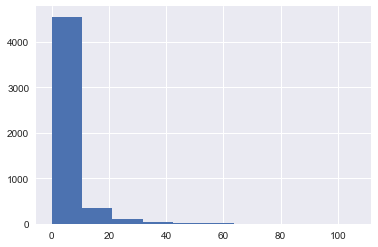

In [5]:
histTarget = plt.hist(TargetClean)

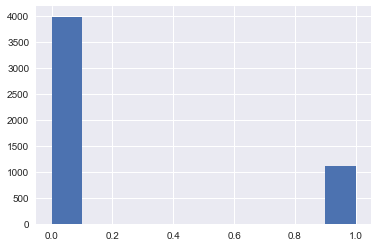

In [6]:
TargetCleanClass5 = []
for ii in range(TargetClean.shape[0]):
    if TargetClean[ii] < 5:
        TargetCleanClass5.append(0)
    else:
        TargetCleanClass5.append(1)
histTarget5 = plt.hist(TargetCleanClass5)

In [7]:
# Make a train/test split using 20% test size
X_train, X_test, y_train5, y_test5 , y_trainSW, y_testSW = train_test_split(
    DataClean, TargetCleanClass5,  TargetClean, test_size=0.20, random_state=11)

In [8]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X_train)
X_train = imp.transform(X_train)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X_test)
X_test = imp.transform(X_test)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

LReg = LogisticRegression(class_weight='balanced')
rfecv = RFECV(estimator=LReg, step=1, cv=StratifiedKFold(10),
              scoring='roc_auc')
rfecv.fit(X_train, y_train5)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 14


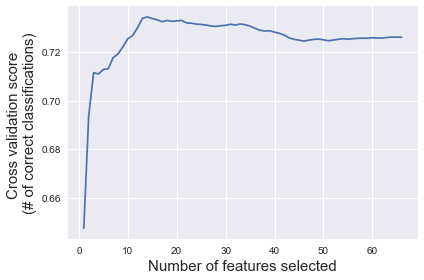

In [52]:
plt.figure()

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Number of features selected", fontsize= 15)
plt.ylabel("Cross validation score \n(# of correct classifications)", fontsize= 15)
plt.tight_layout()


plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/RFECV_LReg.png',
           dpi = 300)

In [11]:
# LReg = LogisticRegression(class_weight='balanced')
# rfe = RFE(estimator=LReg, n_features_to_select=17, step=1)
# rfe.fit(X_train, y_train5)
# # ranking = rfe.ranking_.reshape(digits.images[0].shape)

In [12]:
featureidx = np.where(rfecv.ranking_ == 1)
# (array([ 0,  3,  8, 10, 11, 14, 22, 34, 37, 39, 44, 48]),)
featureidx

(array([ 4,  8, 16, 19, 26, 29, 38, 41, 54, 56, 59, 60, 61, 63]),)

In [13]:
rfecv.ranking_

array([48, 49, 47,  2,  1, 32, 10,  9,  1, 44, 33, 39, 15, 20,  8, 29,  1,
       28, 50,  1,  6,  7, 27, 26, 35, 19,  1, 18, 24,  1, 43, 42, 25, 46,
        4, 40, 38, 31,  1, 34, 17,  1, 21, 53, 30, 45, 23, 11, 41,  5, 37,
       36, 22, 16,  1, 13,  1, 52,  3,  1,  1,  1, 14,  1, 12, 51])

In [15]:
selectedFeatures = DataClean.columns.values[featureidx]
print(selectedFeatures)

['Hip' 'ISTRD1' 'CRBRON15' 'PHLEGM15' 'SitRd02' 'HOSnr02' 'BEER10'
 'COFFEE10' 'HvSnrd02' 'StpBrt02' 'age_s1' 'NECK20' 'gender' 'B']


In [16]:
len(DataClean.columns.values)

66

In [17]:
X_train.shape

(4084, 66)

In [18]:
X_train15 = X_train[:,rfecv.ranking_ == 1]
X_test15 = X_test[:,rfecv.ranking_ == 1]
# F2 score
# recall
# ROC curve

In [19]:
# clf = svm.SVC(class_weight='balanced',probability = True)
clf = LogisticRegression(class_weight='balanced')

In [20]:
ftwo_scorer = metrics.make_scorer(metrics.fbeta_score, beta=2)
Specificity_scorer = metrics.make_scorer(metrics.recall_score, pos_label=0)

In [21]:
scores = cross_val_score(clf,X_train15, y_train5, cv = 10, scoring = 'roc_auc')
scores
print(np.mean(scores))

0.7377156165264016


In [22]:
clf.fit(X_train15,y_train5)
y_predTrain = clf.predict(X_train15)

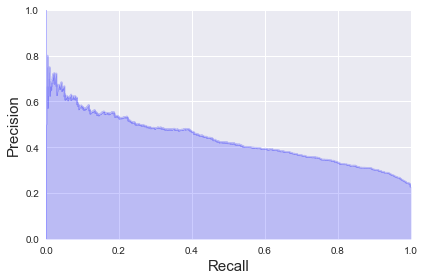

In [51]:
precision, recall, _ = metrics.precision_recall_curve(y_train5, clf.predict_proba(X_train15)[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall', fontsize= 15)
plt.ylabel('Precision', fontsize= 15)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/LReg_RecallPrecision.png',
           dpi = 300)
plt.tight_layout()


# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#           average_precision))

In [24]:
confusion_matrix_train = confusion_matrix(y_train5, clf.predict(X_train15))
print(confusion_matrix_train)

[[2071 1103]
 [ 275  635]]


In [25]:
recalltrain = metrics.recall_score(y_train5, y_predTrain)
precisiontrain = metrics.precision_score(y_train5, y_predTrain)
accuracytrain = metrics.accuracy_score(y_train5, y_predTrain)
f2train = metrics.fbeta_score(y_train5, y_predTrain, beta = 2)
print('recall: %.3f' % recalltrain)
print('precision: %.3f' % precisiontrain)
print('accuracy: %.3f' % accuracytrain)
print('F2: %.3f' % f2train)

recall: 0.698
precision: 0.365
accuracy: 0.663
F2: 0.590


In [26]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1','l2']
C = [0.001,0.01,0.1,1,10,100]
# Create the random grid
parameters = {'penalty': penalty,
               'C': C,}
print(parameters)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
LReg = LogisticRegression(class_weight='balanced', max_iter = 500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
LReg_GridCV = GridSearchCV(LReg, parameters, scoring = 'roc_auc', cv = 5, verbose=0, n_jobs = -1)
# Fit the random search model
LReg_GridCV.fit(X_train15, y_train5)
LReg_GridCV.best_params_

{'C': 10, 'penalty': 'l2'}

In [28]:
penalty = ['l1','l2']
C = [1,5, 10, 50, 100]
# Create the random grid
parameters = {'penalty': penalty,
               'C': C,}
print(parameters)

{'penalty': ['l1', 'l2'], 'C': [1, 5, 10, 50, 100]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
LReg = LogisticRegression(class_weight='balanced', max_iter = 500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
LReg_GridCV = GridSearchCV(LReg, parameters, scoring = 'roc_auc', cv = 5, verbose=0, n_jobs = -1)
# Fit the random search model
LReg_GridCV.fit(X_train15, y_train5)
LReg_GridCV.best_params_

{'C': 5, 'penalty': 'l2'}

In [30]:
penalty = ['l1','l2']
C = [1.5, 3, 5, 7, 9]
# Create the random grid
parameters = {'penalty': penalty,
               'C': C,}
print(parameters)

{'penalty': ['l1', 'l2'], 'C': [1.5, 3, 5, 7, 9]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
LReg = LogisticRegression(class_weight='balanced', max_iter = 500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
LReg_GridCV = GridSearchCV(LReg, parameters, scoring = 'f1', cv = 5, verbose=0, n_jobs = -1)
# Fit the random search model
LReg_GridCV.fit(X_train15, y_train5)
LReg_GridCV.best_params_

{'C': 3, 'penalty': 'l2'}

In [32]:
# clf = svm.SVC(class_weight='balanced',probability = True)
clfTuned = LReg_GridCV.best_estimator_

In [33]:
clfTuned.fit(X_train15,y_train5)
y_predTrain = clfTuned.predict(X_train15)

In [34]:
coefs = clfTuned.coef_

In [35]:
DataClean.columns.values[rfecv.ranking_ == 1]

array(['Hip', 'ISTRD1', 'CRBRON15', 'PHLEGM15', 'SitRd02', 'HOSnr02',
       'BEER10', 'COFFEE10', 'HvSnrd02', 'StpBrt02', 'age_s1', 'NECK20',
       'gender', 'B'], dtype=object)

In [36]:
clfTuned.coef_[0]

array([ 1.88549515, -0.74125599, -0.54501923, -0.35929991,  0.50782364,
        1.59903606,  0.91087152, -0.74302205,  0.61205136,  0.53181342,
        2.83519585,  1.49662545, -0.71378025,  0.48112996])

In [37]:
top_three = np.argpartition(coefs, 3)[-3:]
bottom_three = np.argpartition(coefs, 3)[0:3]

In [38]:
idx = np.argsort(clfTuned.coef_[0])
print(idx)
print(np.flip(idx,axis = 0))

[ 7  1 12  2  3 13  4  9  8  6 11  5  0 10]
[10  0  5 11  6  8  9  4 13  3  2 12  1  7]


In [39]:
selectedFeatures[np.flip(idx,axis = 0)]

array(['age_s1', 'Hip', 'HOSnr02', 'NECK20', 'BEER10', 'HvSnrd02',
       'StpBrt02', 'SitRd02', 'B', 'PHLEGM15', 'CRBRON15', 'gender',
       'ISTRD1', 'COFFEE10'], dtype=object)

/Users/hurdleman/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


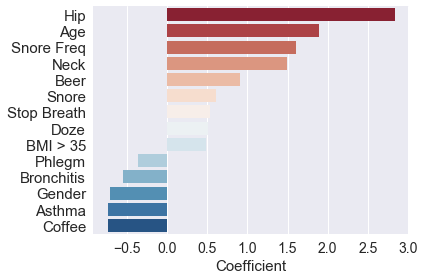

In [40]:
# Generate some sequential data
idx = np.argsort(clfTuned.coef_[0])
idx = np.flip(idx,axis = 0)
x = selectedFeatures[idx]
y1 = clfTuned.coef_[0][idx]
featureImportance = sns.barplot(y = x, x = y1, palette="RdBu")
featureImportance.set_xlabel("Coefficient", fontsize= 15)
featureImportance.set_yticklabels(['Hip','Age','Snore Freq','Neck','Beer','Snore','Stop Breath','Doze',
                                   'BMI > 35','Phlegm','Bronchitis','Gender','Asthma','Coffee'], fontsize= 15)

for item in featureImportance.get_xticklabels():
    item.set_fontsize(14)
plt.tight_layout()
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/LReg_train_FeatureImportance.png',
           dpi = 300)

In [40]:
from sklearn.externals import joblib
joblib.dump(clfTuned, "/Users/hurdleman/Google Drive/Insight HD/flask/model/LReg_tuned.pkl")

['/Users/hurdleman/Google Drive/Insight HD/flask/model/LReg_tuned.pkl']

In [41]:
recalltrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 10, n_jobs = -1, scoring = 'recall')
specificitytrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 10, n_jobs = -1, scoring = Specificity_scorer)
precisiontrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 10, n_jobs = -1, scoring = 'precision')
accuracytrain = cross_val_score(clfTuned,X_train15, y_train5, cv = 10, n_jobs = -1, scoring = 'accuracy')
f2train = cross_val_score(clfTuned,X_train15, y_train5, cv = 10, n_jobs = -1, scoring = ftwo_scorer)

In [42]:
print('recall: %.3f' % np.mean(recalltrain))
print('specificity: %.3f' % np.mean(specificitytrain))
print('precision: %.3f' % np.mean(precisiontrain))
print('accuracy: %.3f' % np.mean(accuracytrain))
print('F2: %.3f' % np.mean(f2train))

recall: 0.689
specificity: 0.654
precision: 0.364
accuracy: 0.662
F2: 0.584


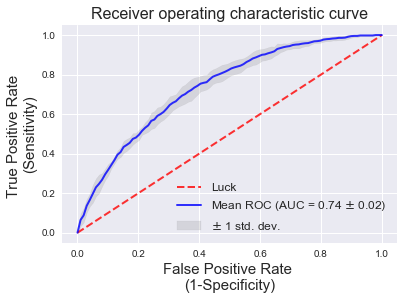

In [43]:
from scipy import interp
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

n_samples, n_features = X_train15.shape
y_train5 = np.asarray(y_train5)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = LReg_GridCV.best_estimator_

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_train15, y_train5):
    probas_ = classifier.fit(X_train15[train], y_train5[train]).predict_proba(X_train15[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train5[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate \n(1-Specificity)', fontsize= 15)
plt.ylabel('True Positive Rate \n(Sensitivity)', fontsize= 15)
plt.title('Receiver operating characteristic curve', fontsize= 16)
plt.legend(loc="lower right", fontsize= 12)
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/ROC_LReg_train.png',
           dpi = 300)

In [44]:
y_predTest = clfTuned.predict(X_test15)

In [45]:
recalltest = metrics.recall_score(y_test5, y_predTest)
precisiontest = metrics.precision_score(y_test5, y_predTest)
accuracytest = metrics.accuracy_score(y_test5, y_predTest)
f2test = metrics.fbeta_score(y_test5, y_predTest, beta = 2)
print('recall: %.3f' % recalltest)
print('precision: %.3f' % precisiontest)
print('accuracy: %.3f' % accuracytest)
print('F2: %.3f' % f2test)

recall: 0.731
precision: 0.351
accuracy: 0.670
F2: 0.601


In [46]:
CM_clfTuned_test = confusion_matrix(y_test5, y_predTest)

In [47]:
CM_clfTuned_test

array([[533, 281],
       [ 56, 152]])

In [48]:
print(metrics.classification_report(y_test5, clfTuned.predict(X_test15)))

             precision    recall  f1-score   support

          0       0.90      0.65      0.76       814
          1       0.35      0.73      0.47       208

avg / total       0.79      0.67      0.70      1022



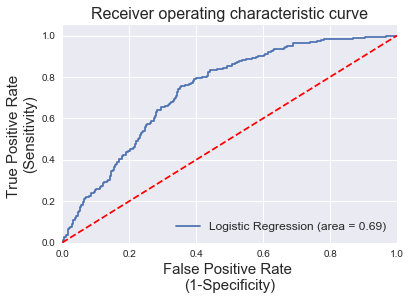

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test5, clfTuned.predict(X_test15))
fpr, tpr, thresholds = roc_curve(y_test5, clfTuned.predict_proba(X_test15)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate \n(1-Specificity)', fontsize= 15)
plt.ylabel('True Positive Rate \n(Sensitivity)', fontsize= 15)
plt.title('Receiver operating characteristic curve', fontsize= 16)
plt.legend(loc="lower right", fontsize= 12)
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/ROC_LReg_test.png',
           dpi = 300)

/Users/hurdleman/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/hurdleman/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/hurdleman/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/hurdleman/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/hurdleman/anaconda/lib/python

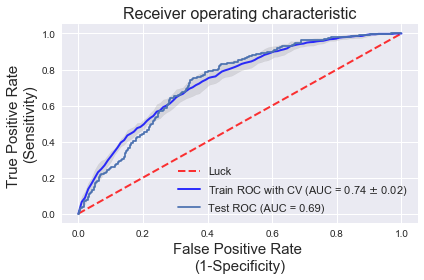

In [50]:
from scipy import interp
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

n_samples, n_features = X_train15.shape
y_train5 = np.asarray(y_train5)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = LReg_GridCV.best_estimator_

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_train15, y_train5):
    probas_ = classifier.fit(X_train15[train], y_train5[train]).predict_proba(X_train15[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train5[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.hold(True)


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Train ROC with CV (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
logit_roc_auc = roc_auc_score(y_test5, clfTuned.predict(X_test15))
fpr, tpr, thresholds = roc_curve(y_test5, clfTuned.predict_proba(X_test15)[:,1])
plt.plot(fpr, tpr, label='Test ROC (AUC = %0.2f)' % logit_roc_auc)
plt.hold(False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate \n(1-Specificity)', fontsize= 15)
plt.ylabel('True Positive Rate \n(Sensitivity)', fontsize= 15)
plt.title('Receiver operating characteristic', fontsize= 16)
plt.legend(loc="lower right", fontsize= 11)
plt.tight_layout()
plt.savefig('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/ROC_LReg_Overlay.png',
           dpi = 300)

In [ ]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [51]:
# Build a MinMaxScaler for selected features
X_train1, X_test1 = train_test_split(
    DataClean, test_size=0.20, random_state=11)

In [52]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)

X_train1 = imp.fit_transform(X_train1)
X_train1 = X_train1[:,rfecv.ranking_ == 1]

scaler4flask = MinMaxScaler()
X_train1 = scaler4flask.fit_transform(X_train1)

In [53]:
# check if two array matches
check = X_train1 == X_train15
np.size(check) - np.count_nonzero(check)

0

In [54]:
from sklearn.externals import joblib
joblib.dump(scaler4flask, "/Users/hurdleman/Google Drive/Insight HD/flask/model/FeatureScaler.pkl")

['/Users/hurdleman/Google Drive/Insight HD/flask/model/FeatureScaler.pkl']

In [55]:
clfTuned.coef_

array([[ 1.51607521, -0.75045493, -0.48873875, -0.30700364,  0.51276521,
         1.57978343,  0.86494872, -0.92173646,  0.54913271,  0.56875288,
         2.77645705,  1.45997746, -0.70926113,  0.41590242]])

In [ ]:
from sklearn.externals import joblib
clfTuned = joblib.load("/Users/hurdleman/Google Drive/Insight HD/flask/model/LReg_tuned.pkl")

In [ ]:
# ['Hip', 'ISTRD1', 'CRBRON15', 'PHLEGM15', 'SitRd02', 'HOSnr02',
#        'BEER10', 'COFFEE10', 'HvSnrd02', 'StpBrt02', 'age_s1', 'NECK20',
#        'gender', 'B']


In [155]:
Hip = 60*2.54
ISTRD1 = 0 
CRBRON15 = 0
PHLEGM15 = 0
SitRd02 = 1
HOSnr02 = 1
BEER10 = 0
COFFEE10 = 0
HvSnrd02 = 1
StpBrt02 = 1
age_s1 = 60
NECK20 = 20*2.54
gender = 1
B = 0
me = [Hip,ISTRD1,CRBRON15,PHLEGM15,SitRd02,HOSnr02,BEER10,COFFEE10,HvSnrd02,StpBrt02,age_s1,NECK20,gender,B]
me = np.reshape(me, (1,14))

In [156]:
me = scaler4flask.transform(me)

In [157]:
clfTuned.coef_

array([[ 1.88549515, -0.74125599, -0.54501923, -0.35929991,  0.50782364,
         1.59903606,  0.91087152, -0.74302205,  0.61205136,  0.53181342,
         2.83519585,  1.49662545, -0.71378025,  0.48112996]])

In [158]:
me

array([[0.12936871, 0.        , 0.        , 0.        , 0.        ,
        0.25      , 0.        , 0.        , 1.        , 1.        ,
        0.41176471, 0.78181818, 0.        , 0.        ]])

In [159]:
clfTuned.predict(me)

array([1])

In [ ]:
scaler4flask = joblib.load("/Users/hurdleman/Google Drive/Insight HD/flask/model/FeatureScaler.pkl")

In [ ]:
# 'Hip' : Hip measurement in centimeters
# 'ISTRD1': 0: No; 1: Yes
# 'CRBRON15': 0: No; 1: Yes
# 'PHLEGM15': 0: No; 1: Yes
# 'SitRd02': What is the chance that you would doze off or fall asleep while sitting and reading?
# 1: No Chance; 
# 2: Slight Chance; 
# 3: Moderate Chance; 
# 4: High Chance
          
# 'HOSnr02': How often do you snore?
# 0: Do not snore any more
# 1: Rarely - (less than one night a week)
# 2: Sometimes - (1 or 2 nights a week)
# 3: Frequently - (3 to 5 nights a week)
# 4: Always or almost always - (6 or 7 nights a week)
# 'BEER10': How many bottles or cans of beer 4 hours before going to sleep last night? (number, up to 2 digits)
# 'COFFEE10' : How many cups of coffee (with caffeine) 4 hours before going to sleep last night? (number, up to 2 digits)
# 'HvSnrd02' 
# 'StpBrt02' Are there times when you stop breathing during your sleep?
# 'age_s1' 
# 'NECK20' 
# 'gender' 1: male, 2: female
# 'B' BMI > 35? 1: yes. 0: no


In [ ]:
# Make a train/test split using 20% test size
X_trainSub, X_valSub, y_trainSub, y_ValSub = train_test_split(
    X_train15, y_train5, test_size=0.20, random_state=11)

In [ ]:
def prob2class(preds_proba, threshold):
    predProb = []
    predClass = []
    for pred in range(len(preds_proba)):
        predProb.append(preds_proba[pred][1])

    for pred in range(len(predProb)):
        if predProb[pred] > threshold:
            predClass.append(1)
        else:
            predClass.append(0)
    return predClass

In [ ]:
clfTuned.fit(X_trainSub,y_trainSub)
y_valSubProba = clfTuned.predict_proba(X_valSub)

In [ ]:
for threshold in range(0,21):
    print(threshold)

In [ ]:
sensitivity = []
specificity = []
for threshold in range(0,21):
    predClass = prob2class(y_valSubProba, threshold*0.05)
    sensitivity.append(metrics.recall_score(y_ValSub, predClass))
    specificity.append(metrics.recall_score(y_ValSub, predClass, pos_label=0))

In [ ]:
plt.plot(sensitivity)
plt.plot(specificity)
plt.show()

In [ ]:
predClass

In [ ]:
probaPredTest = clfTuned.predict_proba(X_test15)

In [ ]:
predTest = probaPredTest > 0.3

In [ ]:
predTest[:,1]

In [ ]:
predTest = predTest[:,1].astype(int)


In [ ]:
print(metrics.classification_report(y_test5, predTest))

